In [2]:
import numpy as np

csv_path = "/home/hpaat/imbalanced_data/tabsyn/synthetic/default/tabsyn.csv"
tabsyn_data = np.loadtxt(csv_path, delimiter=',', skiprows=1)

num_col_idx = [0, 4, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
column_names = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month']
num_column_names = [name for index, name in enumerate(column_names) if index in num_col_idx]
tabsyn_data_num_0 = tabsyn_data[tabsyn_data[:,-1]==0][:, num_col_idx]
tabsyn_data_num_1 = tabsyn_data[tabsyn_data[:,-1]==1][:, num_col_idx]
print(num_column_names)

['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


In [3]:
# Plotting Numerical Data with target
import pandas as pd

num_data_w_target = np.concatenate((tabsyn_data[:, num_col_idx], tabsyn_data[:,-1].reshape(-1,1)), axis=1)
print(num_data_w_target.shape)

# Create pd dataframe
columns = [i for i in num_column_names] + ['class']
print(len(columns))
df = pd.DataFrame(num_data_w_target, columns=columns)

(27000, 15)
15


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
# 1. Pair Plot
# sns.pairplot(df, hue='class')
# plt.show()

# 2. Correlation Heatmap
# corr_matrix = df.corr()
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# plt.show()

# 3. t-SNE Plots
# from sklearn.manifold import TSNE

# # Assuming X is your feature matrix and y is the target variable
# X_embedded = TSNE(n_components=2).fit_transform(tabsyn_data[:, num_col_idx])
# plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=tabsyn_data[:,-1])
# plt.show()

# 4. Box plots
# for feature in df.columns[:-1]:  # Assuming the last column is the target variable
#     sns.boxplot(x='class', y=feature, data=df)
#     plt.show()

# 5. Violin Plots
# for feature in df.columns[:-1]:  # Assuming the last column is the target variable
#     sns.violinplot(x='class', y=feature, data=df)
#     plt.show()


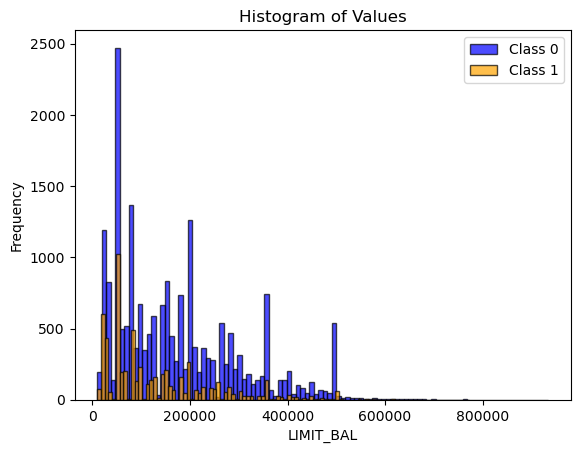

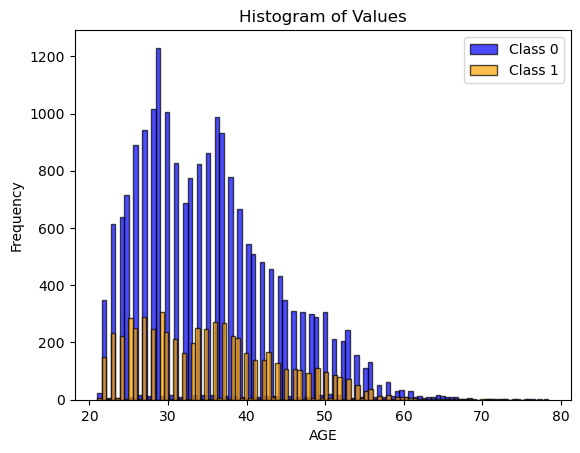

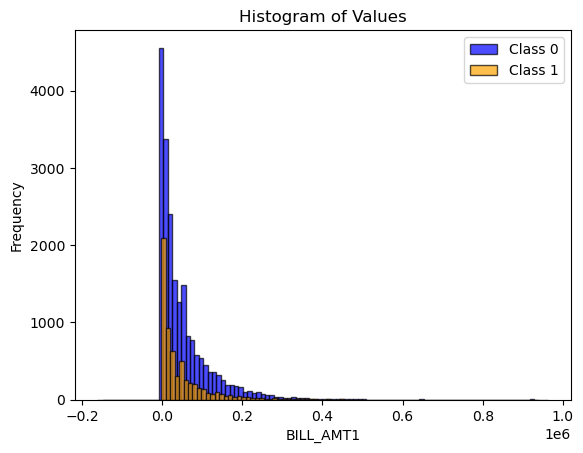

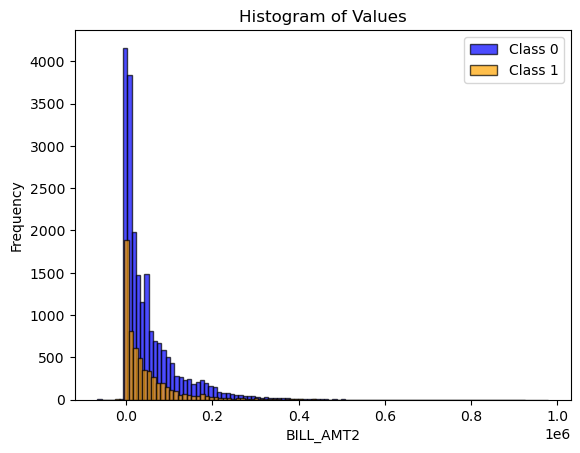

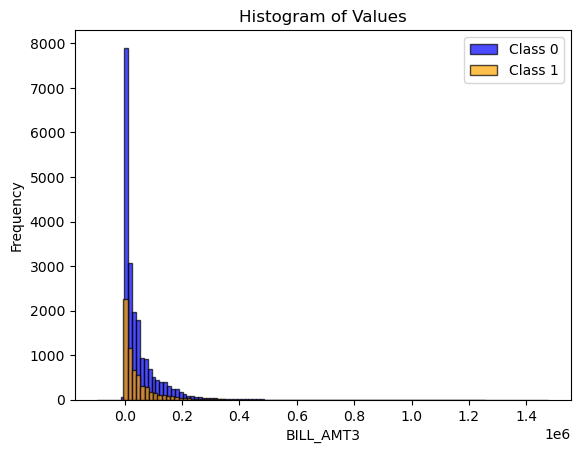

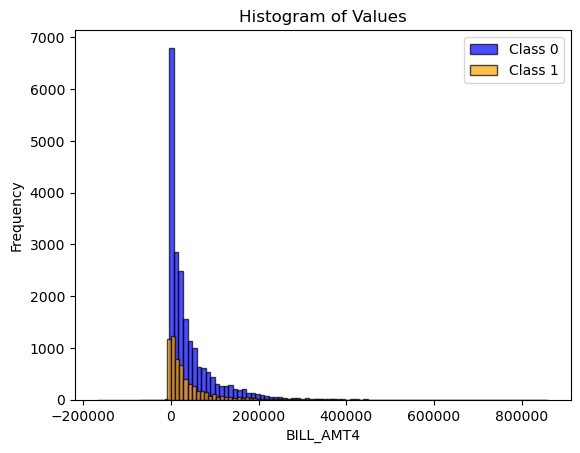

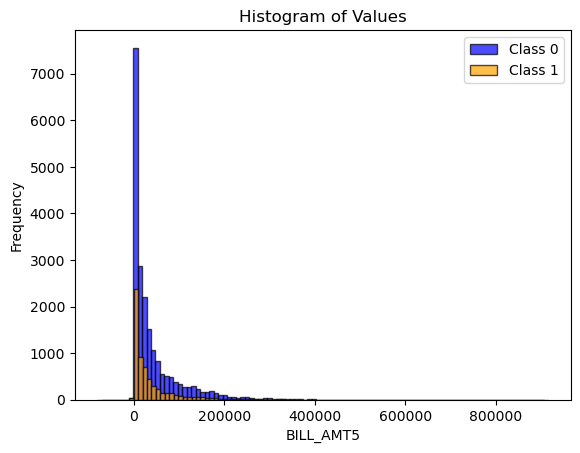

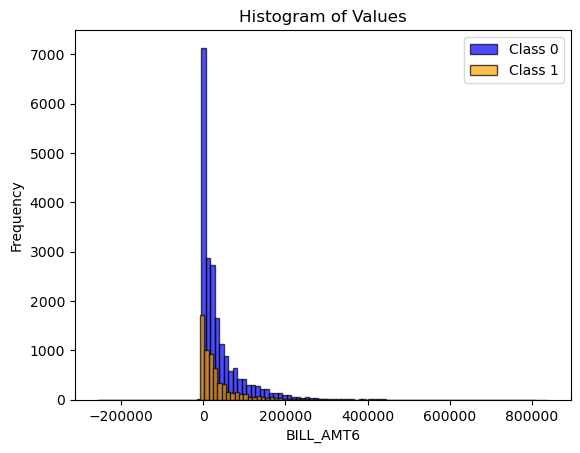

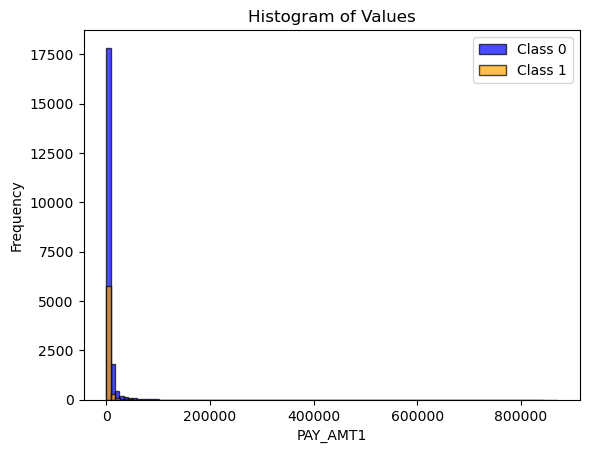

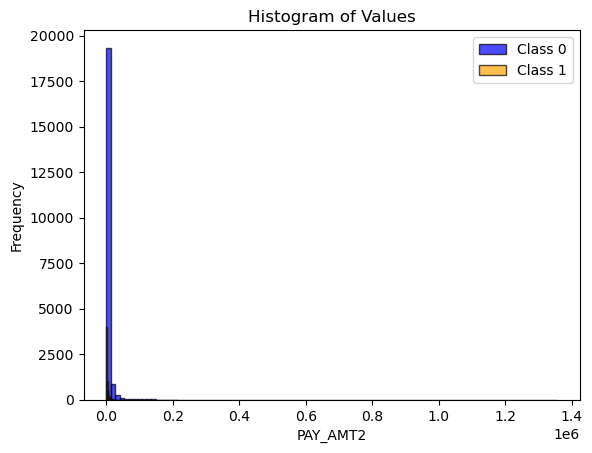

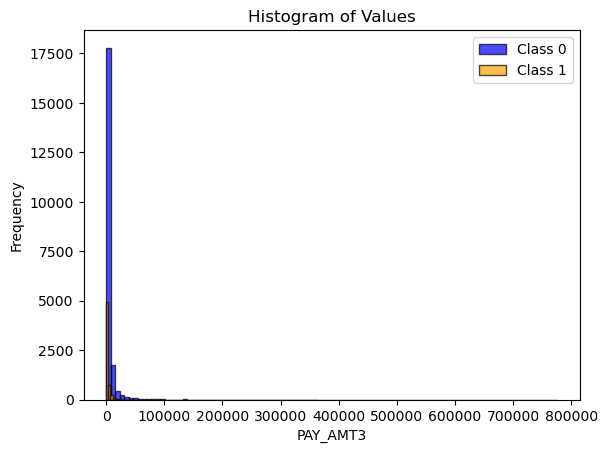

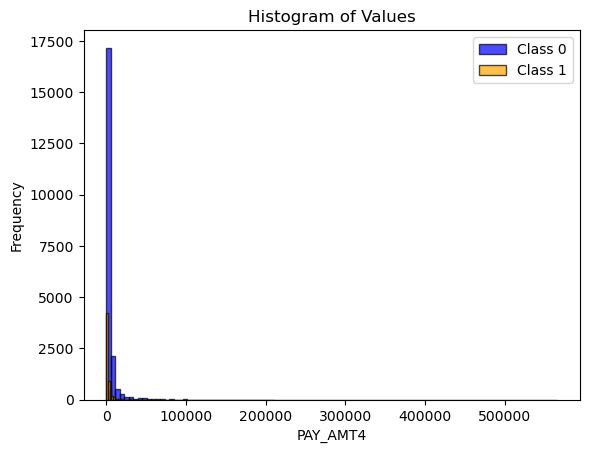

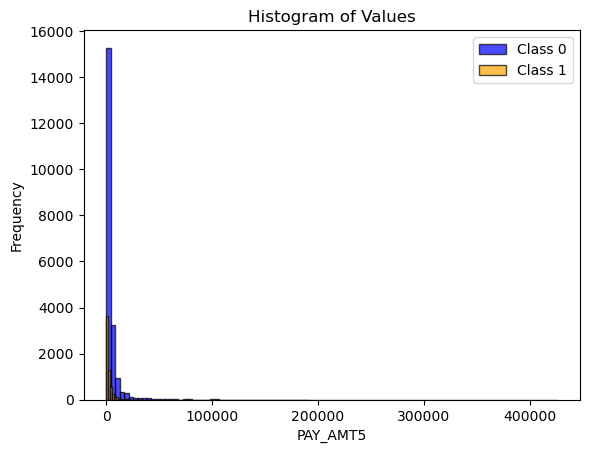

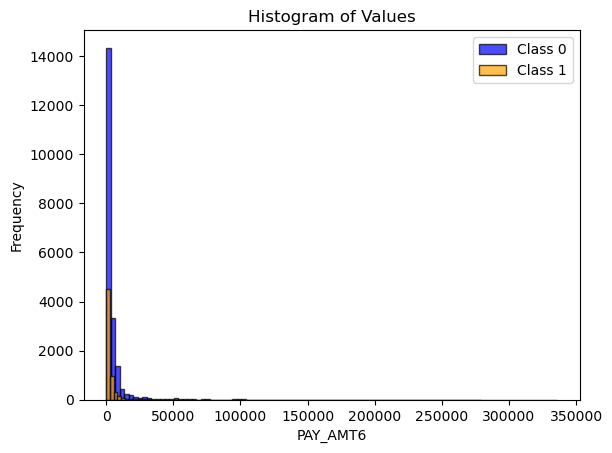

In [5]:
for i in range(len(num_col_idx)):
    # Plot the histogram
    plt.hist(tabsyn_data_num_0[:,i], bins=100, color='blue', edgecolor='black', alpha=0.7, label='Class 0',)
    plt.hist(tabsyn_data_num_1[:,i], bins=100, color='orange', edgecolor='black', alpha=0.7, label='Class 1',)

    plt.xlabel(num_column_names[i])
    plt.ylabel('Frequency')
    plt.title('Histogram of Values')

    plt.legend()

    plt.show()

(14,)
14


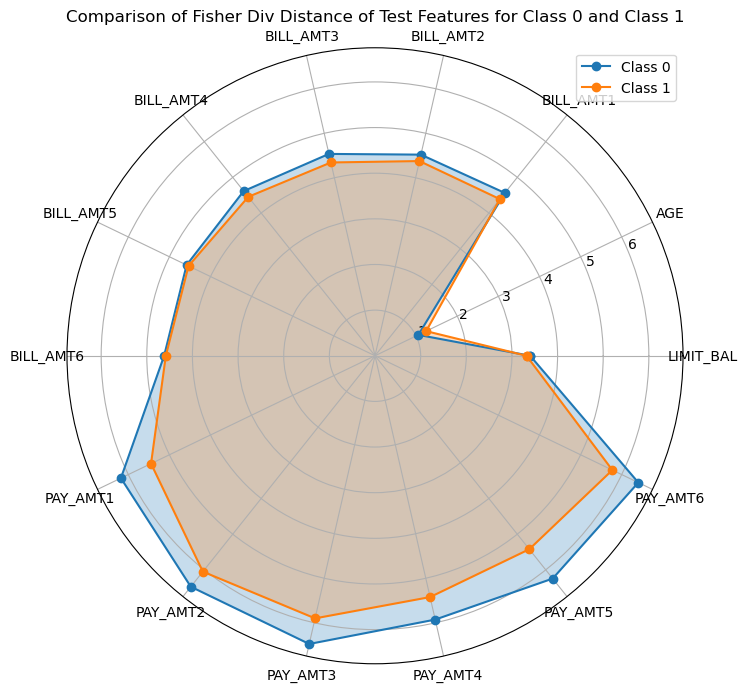

In [7]:
# PLOT THE WASSERSTEIN DISTANCE OF THE TEST SAMPLE PROB TO THE SYNTHETIC DATA CORRESPONDING TO MAJOR CLASS 0 

def plot_radar_chart(property1_distances, property2_distances, features, title):
    num_features = len(features)
    print(num_features)

    # Calculate the angles for each feature
    angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False)

    # Make the plot circular
    property1_distances = np.concatenate((property1_distances, [property1_distances[0]]))
    property2_distances = np.concatenate((property2_distances, [property2_distances[0]]))
    angles = np.concatenate((angles, [angles[0]]))

    # Plot the radar chart
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    ax.plot(angles, property1_distances, label='Class 0', marker='o')
    ax.plot(angles, property2_distances, label='Class 1', marker='o')

    # Fill the area enclosed by the lines
    ax.fill(angles, property1_distances, alpha=0.25)
    ax.fill(angles, property2_distances, alpha=0.25)

    # Set the ticks and labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(features)

    # Add labels
    ax.set_title(title)
    ax.legend()

    # Show the plot
    plt.show()


# # 1000 samples for one test dist Wass dist
# f_wass_d_0 = np.array([0.65655947, 0.21334253, 1.1279105 , 1.1232563 , 1.1412488 ,
#                         1.1585171 , 1.1669912 , 1.1849194 , 2.2062595 , 3.0357783 ,
#                         2.5852385 , 2.4670007 , 2.435322  , 2.633376  ], dtype=np.float32)
# f_wass_d_1 = np.array([0.6659112, 0.2320287, 1.0555545, 1.0532384, 1.0499998, 1.0813049,
#                         1.1126183, 1.1289289, 1.963001 , 2.7610872, 2.314725 , 2.2231495,
#                         2.1520367, 2.4063249], dtype=np.float32)

# # 10000 samples for one test dist Wass dist
# f_wass_d_0 = np.array([0.655173  , 0.21311606, 1.125789  , 1.1227795 , 1.1394417 ,
#                         1.156604  , 1.1653795 , 1.1821823 , 2.2058825 , 3.034125  ,
#                         2.5854287 , 2.4656072 , 2.4359224 , 2.6317601 ], dtype=np.float32)
# f_wass_d_1 = np.array([0.66500866, 0.23194505, 1.05624   , 1.0533719 , 1.0523989 ,
#                         1.0792396 , 1.1102899 , 1.1255696 , 1.9619688 , 2.7529693 ,
#                         2.314855  , 2.219496  , 2.153787  , 2.4052408 ], dtype=np.float32)
    
# Fisher divergence
f_wass_d_0 = np.array([3.3997052, 1.0541513, 4.5627766, 4.520183 , 4.536422 , 4.6150026,
                        4.58168  , 4.6203413, 6.179751 , 6.472652 , 6.477362 , 5.9291773,
                        6.2442546, 6.4033666], dtype=np.float32)
f_wass_d_1 = np.array([3.3202188, 1.2433413, 4.38927  , 4.3757815, 4.3440547, 4.4538097,
                        4.5349855, 4.583238 , 5.4468713, 6.049914 , 5.901973 , 5.423191 ,
                        5.421976 , 5.7720757], dtype=np.float32)

print(f_wass_d_1.shape)
plot_radar_chart(f_wass_d_0, f_wass_d_1, num_column_names, 'Comparison of Fisher Div Distance of Test Features for Class 0 and Class 1')